<a href="https://colab.research.google.com/github/51stDimension/EDAExperiments/blob/main/Experiment%204/EXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,f1_score?
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/51stDimension/EDAExperiments/main/Experiment%204/climate_change.csv")

In [27]:
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


# **Analysing the Data**

Seeing how the variable are correlated

In [5]:
df.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


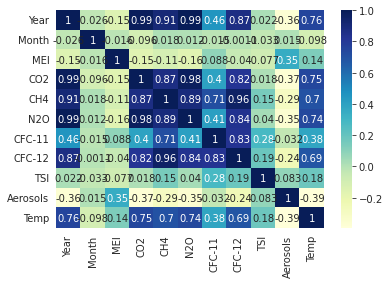

In [9]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

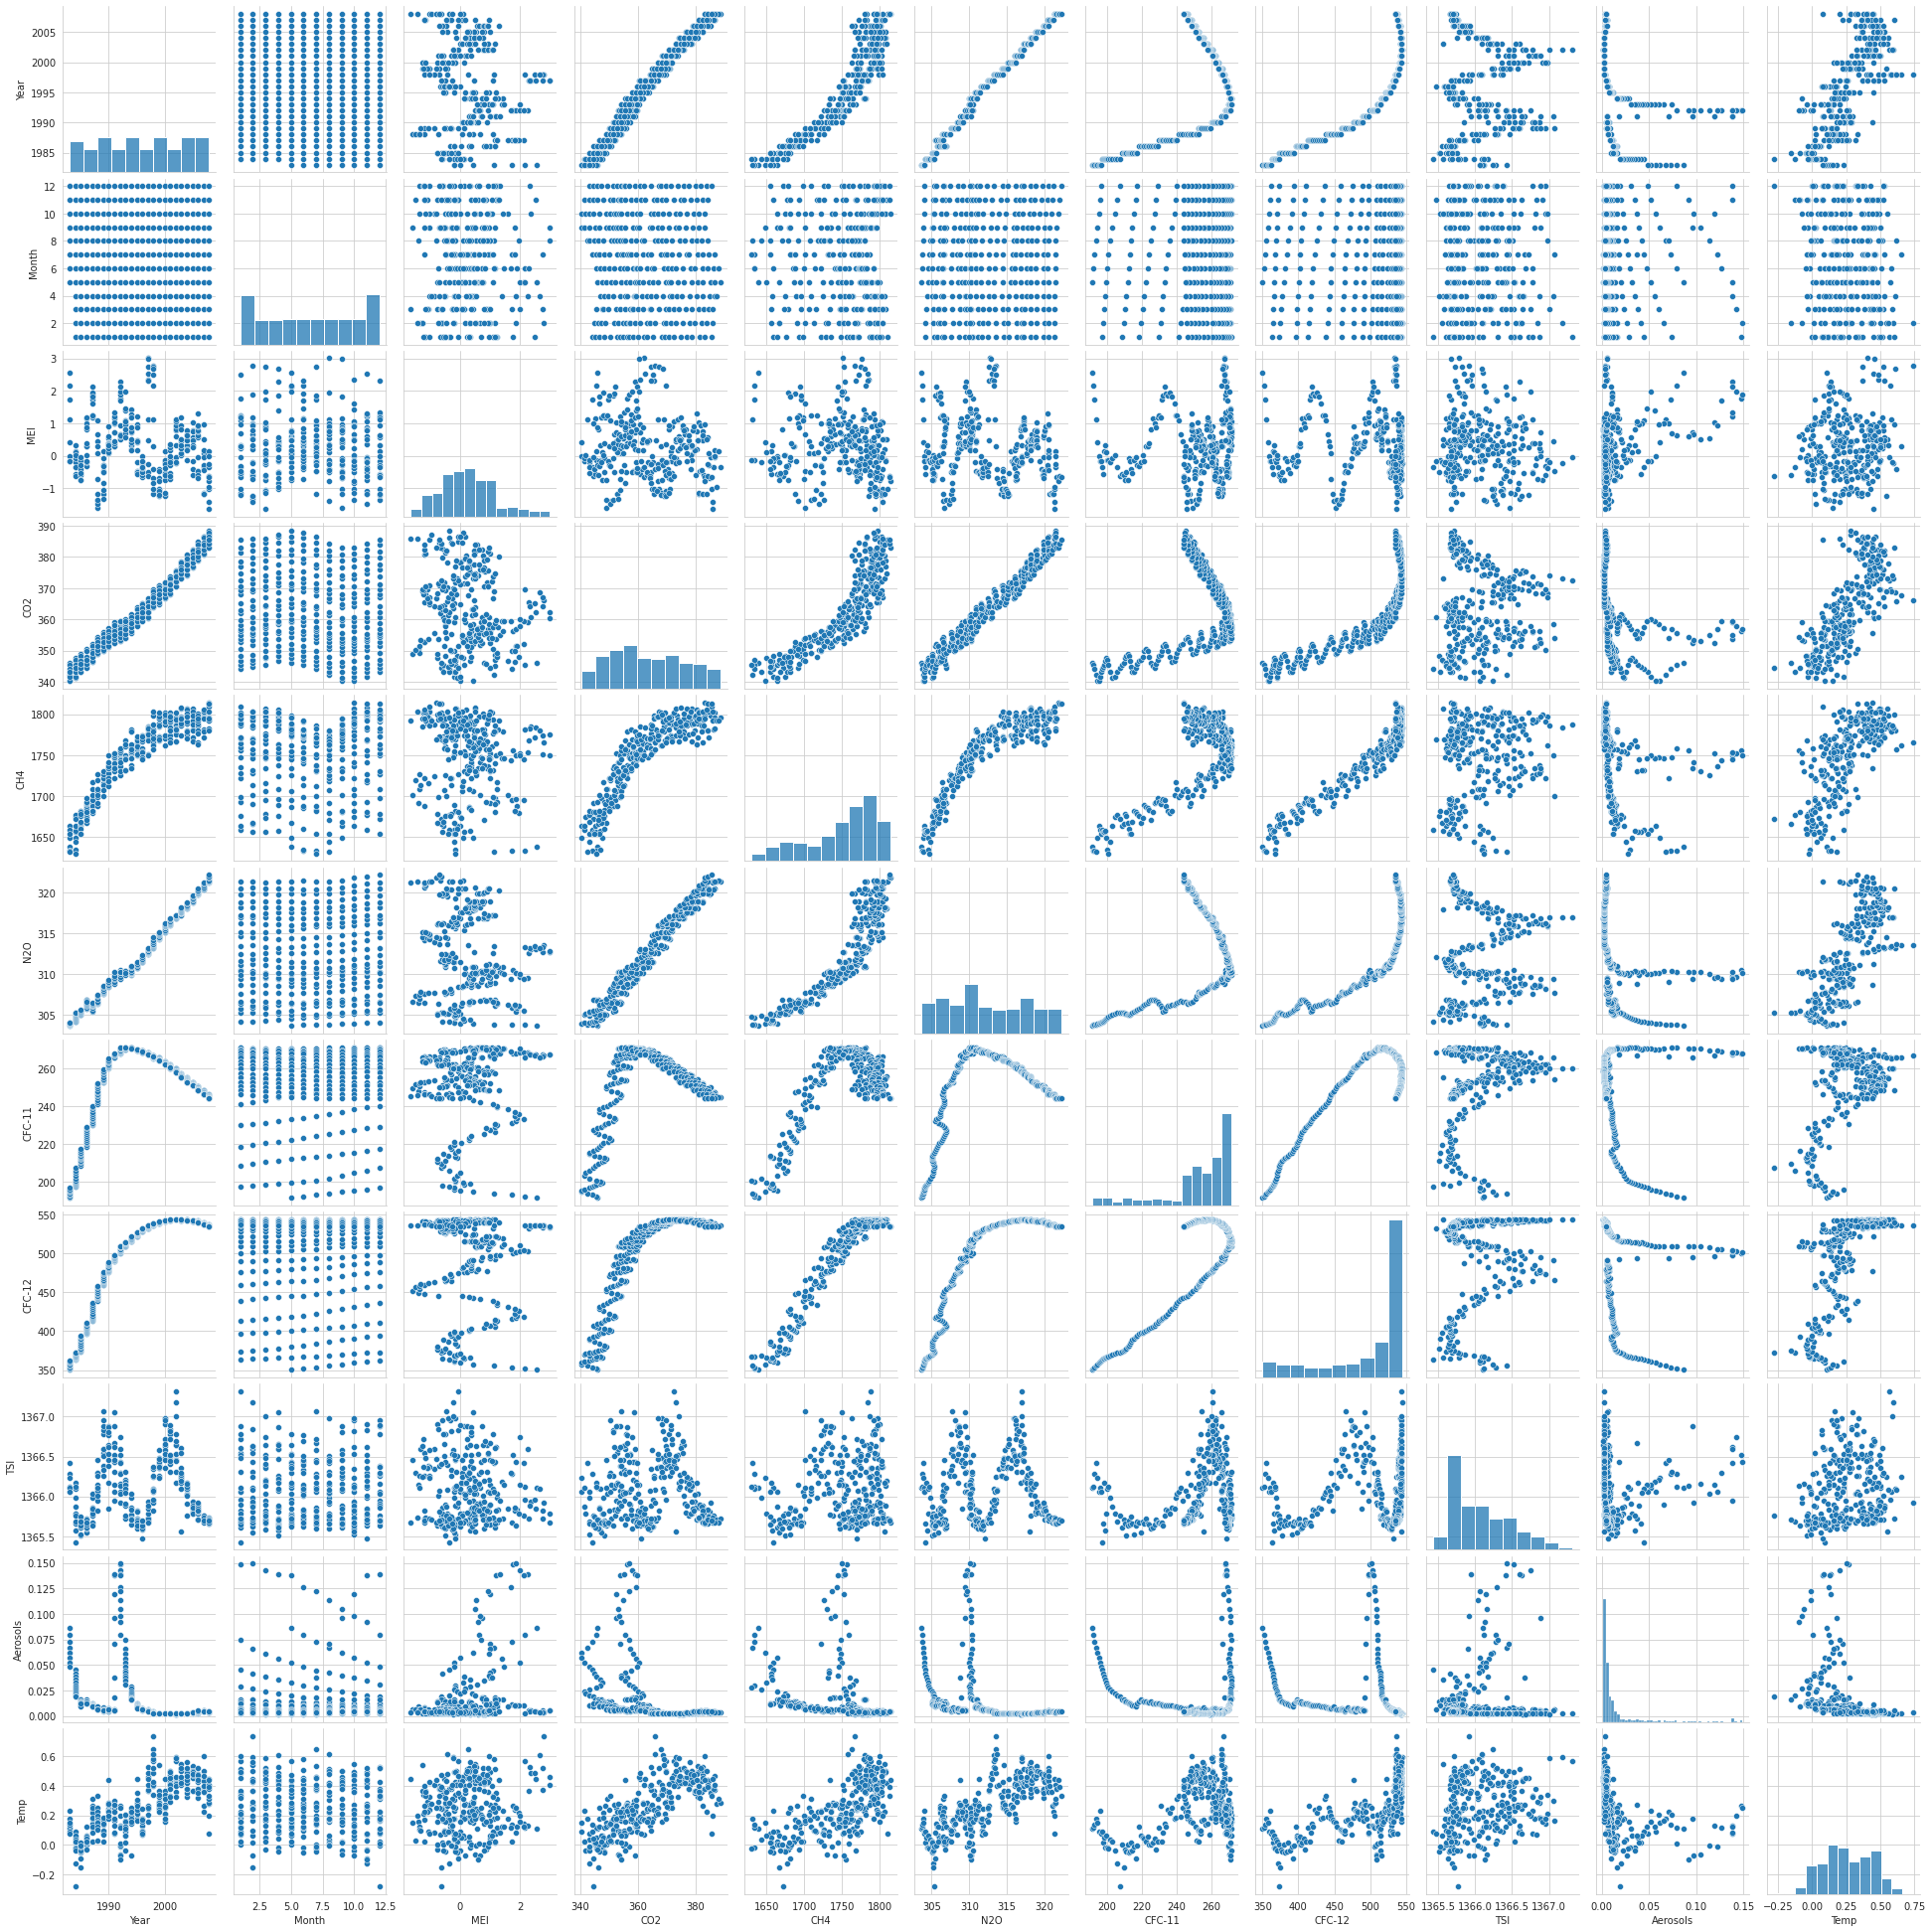

In [8]:
sns.pairplot(df)

**Looking at the above two plot(heatmap and the pairplot) we can make some conclusions about the correlation in the data:**

The target variable has very less correlation with variables like Aerosols, Month and TSI but has a significant correlation with other variables like
CO2, CH4 and N2O.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [ ]:
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


**Problem 1.1**

---

First read the dataset climate_change.csv into Python.
Then, split the data into a training set, consisting of all the observations up to and including 2006, and a testing set consisting of the remaining years (hint: use subset). A training set refers to the data that will be used to build the model, and a testing set refers to the data we will use to 
test our predictive ability.
Next, build a linear regression model to predict the dependent variable Temp, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables (Year and Month should NOT be used in the model). Use the training set to build the model.
Enter the model R2 (the "Multiple R-squared" value)

In [11]:
df_train = df[df['Year'] <= 2006]
df_test  = df[df['Year'] > 2006]

In [12]:
X_train = df_train[["MEI","CO2","CH4","N2O","CFC-11","CFC-12","TSI","Aerosols"]]
X_test = df_test[["MEI","CO2","CH4","N2O","CFC-11","CFC-12","TSI","Aerosols"]]
Y_train  = df_train[["Temp"]]
Y_test  = df_test[["Temp"]]

In [13]:
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

from statsmodels.api import OLS
model = OLS(Y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Temp   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              314.3
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                   7.35e-134
Time:                        16:24:05   Log-Likelihood:                          261.15
No. Observations:                 284   AIC:                                     -506.3
Df Residuals:                     276   BIC:                                     -477.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEI            0.0553      0.007      8.209      0.000       0.042       0.069
CO2            0.0062      0.002      2.560      0.011       0.001       0.011
CH4          7.06e-05      0.001      0.128      0.898      -0.001       0.001
N2O           -0.0132      0.009     -1.452      0.148      -0.031       0.005
CFC-11        -0.0058      0.002     -3.351      0.001      -0.009      -0.002
CFC-12         0.0036      0.001      3.311      0.001       0.001       0.006
TSI            0.0012      0.002      0.729      0.467      -0.002       0.005
Aerosols      -1.3314      0.225     -5.922      0.000      -1.774      -0.889
==============================================================================
Omnibus:                        5.432   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.298
Skew:                           0.265   Prob(JB):                       0.0707
Kurtosis:                       3.409   Cond. No.                     9.04e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
Y_pred=linreg.predict(X_test)

In [15]:
Accuracy=r2_score(Y_test,Y_pred)
print("R2 score of the model is %.2f" %Accuracy)
linreg.score(X_test, Y_test)

R2 score of the model is 0.18


0.18377835333134962

# Now let us try and make a model with each individual variable as the predictor variable and see the results:

We will be running a loop for all the column attributes except Month,year and temperature itself and will make a model taking that variable as individual predictor variable

In [24]:
for col in df:
  if col=="Year" or col=="Month" or col=="Temp":
    continue
    
  print('Testing for '+col+' vs Temp')

  X = X_train[[col]]
  y = Y_train
  regr = LinearRegression()
  regr.fit(X, y)
  print("Coefficients for all attributes : ",regr.coef_)
  f = regr.predict(np.array(X_test[col]).reshape(-1, 1))
  r2 = r2_score(Y_test, f)
  print('r2 score for this model is : ', r2)

Testing for MEI vs Temp
Coefficients for all attributes :  [[0.03360508]]
r2 score for this model is :  -1.662215044104026
Testing for CO2 vs Temp
Coefficients for all attributes :  [[0.01248554]]
r2 score for this model is :  -2.92562243636237
Testing for CH4 vs Temp
Coefficients for all attributes :  [[0.00278925]]
r2 score for this model is :  -0.2606461625131886
Testing for N2O vs Temp
Coefficients for all attributes :  [[0.02963935]]
r2 score for this model is :  -2.5408746886236506
Testing for CFC-11 vs Temp
Coefficients for all attributes :  [[0.00351877]]
r2 score for this model is :  -1.6945376446857718
Testing for CFC-12 vs Temp
Coefficients for all attributes :  [[0.0021092]]
r2 score for this model is :  -0.042784892653006557
Testing for TSI vs Temp
Coefficients for all attributes :  [[0.10986083]]
r2 score for this model is :  -2.253588106246505
Testing for Aerosols vs Temp
Coefficients for all attributes :  [[-2.32296391]]
r2 score for this model is :  -0.6397171917625124

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

**Problem 1.2**

---

Now we need to only consider predictor variables such that the p-value is <= 0.05 and if it is greater than we shall drop it.

In [ ]:
from scipy import stats
from scipy.stats import pearsonr

CATEGORICAL_VARIABLES = ["MEI", 
                       "CH4", 
                       "CO2", 
                       "N2O", 
                       "CFC-11", 
                       "CFC-12", 
                       "TSI", 
                       "Aerosols"]

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Temp   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              314.3
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                   7.35e-134
Time:                        09:53:41   Log-Likelihood:                          261.15
No. Observations:                 284   AIC:                                     -506.3
Df Residuals:                     276   BIC:                                     -477.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEI            0.0553      0.007      8.209      0.000       0.042       0.069
CO2            0.0062      0.002      2.560      0.011       0.001       0.011
CH4          7.06e-05      0.001      0.128      0.898      -0.001       0.001
N2O           -0.0132      0.009     -1.452      0.148      -0.031       0.005
CFC-11        -0.0058      0.002     -3.351      0.001      -0.009      -0.002
CFC-12         0.0036      0.001      3.311      0.001       0.001       0.006
TSI            0.0012      0.002      0.729      0.467      -0.002       0.005
Aerosols      -1.3314      0.225     -5.922      0.000      -1.774      -0.889
==============================================================================
Omnibus:                        5.432   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.298
Skew:                           0.265   Prob(JB):                       0.0707
Kurtosis:                       3.409   Cond. No.                     9.04e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**So we will be dropping CH4 and N20 and then we will train our model again**

In [ ]:
X_train = df_train[["MEI","CO2","CFC-11","CFC-12","TSI","Aerosols"]]
X_test = df_test[["MEI","CO2","CFC-11","CFC-12","TSI","Aerosols"]]
Y_train  = df_train[["Temp"]]
Y_test  = df_test[["Temp"]]

In [ ]:
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred=linreg.predict(X_test)

In [ ]:
model = OLS(Y_train,X_train).fit()
model.rsquared


0.9003190370297778